# 1.深度卷积神经网络（AlexNet）

在LeNet提出后的将近20年里，神经网络一度被其他机器学习方法超越，如支持向量机。虽然LeNet可以在早期的小数据集上取得好的成绩，但是在更大的真实数据集上的表现并不尽如人意。一方面，神经网络计算复杂。虽然20世纪90年代也有过一些针对神经网络的加速硬件，但并没有像之后GPU那样大量普及。因此，训练一个多通道、多层和有大量参数的卷积神经网络在当年很难完成。另一方面，当年研究者还没有大量深入研究参数初始化和非凸优化算法等诸多领域，导致复杂的神经网络的训练通常较困难。

神经网络可以直接基于图像的原始像素进行分类。这种称为端到端（end-to-end）的方法节省了很多中间步骤。然而，在很长一段时间里更流行的是研究者通过勤劳与智慧所设计并生成的手工特征。这类图像分类研究的主要流程是：

1. 获取图像数据集
2. 使用已有的特征提取函数生成图像的特征
3. 使用机器学习模型对图像的特征分类


## 学习特征表示

既然特征如此重要，它该如何表示呢？

在相当长的时间里，特征都是基于各式各样手工设计的函数从数据中提取的。不少研究者通过提出新的特征提取函数不断改进图像分类结果，为计算机视觉的发展做出了重要贡献。

另一些研究者则持异议认为特征本身也应该由学习得来。为了足够复杂的输入，特征本身应该分级表示，多层神经网络可以学得数据的多级表征，并逐级表示越来越抽象的概念或模式。以图像分类为例，在多层神经网络中，图像的第一级的表示可以是在特定的位置和⻆度是否出现边缘；而第二级的表示说不定能够将这些边缘组合出有趣的模式，如花纹；在第三级的表示中，也许上一级的花纹能进一步汇合成对应物体特定部位的模式。这样逐级表示下去，模型最终能够较容易根据最后一级的表示完成分类任务。其中输入的逐级表示是由多层模型中的参数决定，而这些参数都是学出来的。

但是当时由于一些客观条件的不足，未能实现这一想法。


### 缺失要素一：数据

包含许多特征的深度模型需要大量的有标签的数据才能表现得比其他经典方法更好。限于早期计算机有限的存储，大部分研究只基于小的公开数据集。例如，不少研究论文基于公开数据集，其中许多数据集只有几百至几千张图像。这一状况在2010年前后兴起的大数据浪潮中得到改善。特别是，2009年诞生的ImageNet数据集包含了1,000大类物体，每类有多达数千张不同的图像，这极大推动了计算机视觉和机器学习研究进入新的阶段，使此前的传统方法不再有优势。


### 缺失要素二：硬件

深度学习对计算资源要求很高，早期的硬件计算能力有限，这使训练较复杂的神经网络变得很困难，GPU的到来改变了这一格局。


## AlexNet

2012年，AlexNet横空出世。这个模型的名字来源于论文第一作者的姓名Alex Krizhevsky 。AlexNet使用了8层卷积神经网络，并以很大的优势赢得了ImageNet 2012图像识别挑战赛。它首次证明了学习到的特征可以超越手工设计的特征，从而一举打破计算机视觉研究的前状。

AlexNet与LeNet的设计理念非常相似，但也有显著的区别。

第一，与相对较小的LeNet相比，AlexNet包含8层变换，其中有5层卷积和2层全连接隐藏层，以及1个全连接输出层。

AlexNet第一层中的卷积窗口形状是$11\times11$。第二层中的卷积窗口形状减小到$5\times5$，之后全采用$3\times3$。此外，第一、第二和第五个卷积层之后都使用了窗口形状为$3\times3$、步幅为2的最大池化层。而且AlexNet使用的卷积通道数也大于LeNet中的卷积通道数数十倍。最后是两个输出个数为4,096的全连接层。

第二，AlexNet将sigmoid激活函数改成了更加简单的ReLU激活函数。一方面，ReLU激活函数的计算更简单，例如它并没有sigmoid激活函数中的求幂运算。另一方面，ReLU激活函数在不同的参数初始化方法下使模型更容易训练,当sigmoid激活函数输出极接近0或1时，这些区域的梯度几乎为0，从而造成反向传播无法继续更新部分模型参数；而ReLU激活函数在正区间的梯度恒为1。因此，若模型参数初始化不当，sigmoid函数可能在正区间得到几乎为0的梯度，从而令模型无法得到有效训练。

第三，AlexNet通过丢弃法来控制全连接层的模型复杂度。而LeNet并没有使用丢弃法。






                                      : <center>LeNet（左）到AlexNet（右）</ceneter>:

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

net = nn.Sequential(
    # 这里，我们使用一个11*11的更大窗口来捕捉对象。
    # 同时，步幅为4，以减少输出的高度和宽度。
    # 另外，输出通道的数目远大于LeNet
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 减小卷积窗口，使用填充为2来使得输入与输出的高和宽一致，且增大输出通道数
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 使用三个连续的卷积层和较小的卷积窗口。
    # 除了最后的卷积层，输出通道的数量进一步增加。
    # 在前两个卷积层之后，汇聚层不用于减少输入的高度和宽度
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    # 这里，全连接层的输出数量是LeNet中的好几倍。使用dropout层来减轻过拟合
    nn.Linear(6400, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    # 最后是输出层。由于这里使用Fashion-MNIST，所以用类别数为10，而非论文中的1000
    nn.Linear(4096, 10))

我们构造一个 单通道数据，来观察每一层输出的形状

In [9]:
X = torch.randn(1, 1, 224, 224)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'Output shape:\t', X.shape)

Conv2d Output shape:	 torch.Size([1, 96, 54, 54])
ReLU Output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d Output shape:	 torch.Size([1, 96, 26, 26])
Conv2d Output shape:	 torch.Size([1, 256, 26, 26])
ReLU Output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d Output shape:	 torch.Size([1, 256, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 256, 12, 12])
ReLU Output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d Output shape:	 torch.Size([1, 256, 5, 5])
Flatten Output shape:	 torch.Size([1, 6400])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1,

Fashion-MNIST图像的分辨率 低于ImageNet图像。 我们将它们增加到 $224 \times 224$

In [6]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

训练AlexNet

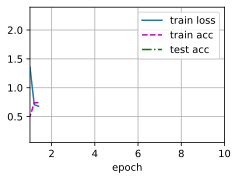

In [ ]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

loss 0.334, train acc 0.878, test acc 0.888
3863.6 examples/sec on gpu(0)



# 2.使用重复元素的网络（VGG）

AlexNet在LeNet的基础上增加了3个卷积层。但AlexNet作者对它们的卷积窗口、输出通道数和构造顺序均做了大量的调整。虽然AlexNet指明了深度卷积神经网络可以取得出色的结果，但并没有提供简单的规则以指导后来的研究者如何设计新的网络。VGG提出了可以通过重复使用简单的基础块来构建深度模型的思路。

## VGG块

VGG块的组成规律是：连续使用数个相同的填充为1、窗口形状为$3\times 3$的卷积层后接上一个步幅为2、窗口形状为$2\times 2$的最大池化层。卷积层保持输入的高和宽不变，而池化层则对其减半。我们使用`vgg_block`函数来实现这个基础的VGG块，它可以指定卷积层的数量`num_convs`和输出通道`num_channels`。

In [ ]:

import torch
from torch import nn
from d2l import torch as d2l

#定义了一个名为vgg_block的函数来实现一个VGG块
#该函数有三个参数，分别对应于卷积层的数量num_convs、输入通道的数量in_channels 和输出通道的数量out_channels.
def vgg_block(num_convs, in_channels, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels, out_channels,
                                kernel_size=3, padding=1))
        layers.append(nn.ReLU())
        in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

原始VGG网络有5个卷积块，其中前两个块各有一个卷积层，后三个块各包含两个卷积层。 第一个模块有64个输出通道，每个后续模块将输出通道数量翻倍，直到该数字达到512。由于该网络使用8个卷积层和3个全连接层，因此它通常被称为VGG-11。

In [ ]:
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))

In [ ]:
def vgg(conv_arch):
    conv_blks = []
    in_channels = 1
    # 卷积层部分
    for (num_convs, out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs, in_channels, out_channels))
        in_channels = out_channels

    return nn.Sequential(
        *conv_blks, nn.Flatten(),
        # 全连接层部分
        nn.Linear(out_channels * 7 * 7, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 10))

net = vgg(conv_arch)

In [ ]:
X = torch.randn(size=(1, 1, 224, 224))
for blk in net:
    X = blk(X)
    print(blk.__class__.__name__,'output shape:\t',X.shape)

In [ ]:
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)

In [ ]:
lr, num_epochs, batch_size = 0.05, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

# 3.网络中的网络（NiN）
LeNet、AlexNet和VGG都有一个共同的设计模式：通过一系列的卷积层与汇聚层来提取空间结构特征；然后全连接层对特征的表征进行处理。 AlexNet和VGG对LeNet的改进主要在于如何扩大和加深这两个模块。 然而，如果在这个过程的早期使用了全连接层，可能会完全放弃表征的空间结构。 网络中的网络（NiN）提供了一个非常简单的解决方案：在每个像素的通道上分别使用多层感知机，即$1\times 1$的卷积核

## NiN块

卷积层的输入和输出由四维张量组成，张量的每个轴分别对应样本、通道、高度和宽度,全连接层的输入和输出通常是分别对应于样本和特征的二维张量。 NiN的想法是在每个像素位置（针对每个高度和宽度）应用一个全连接层。 如果我们将权重连接到每个空间位置，我们可以将其视为卷积层，或作为在每个像素位置上独立作用的全连接层。 从另一个角度看，即将空间维度中的每个像素视为单个样本，将通道维度视为不同特征（feature）。

上图说明了VGG和NiN及它们的块之间主要架构差异。NiN块以一个普通卷积层开始，后面是两个$1\times 1$的卷积层。这两个卷积层充当带有ReLU激活函数的逐像素全连接层

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

#定义了一个名为nin_block的函数来实现一个nin块
def nin_block(in_channels, out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size, strides, padding),
        nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU())

NiN和AlexNet之间的一个显著区别是NiN完全取消了全连接层。 后面使用一个NiN块，使其输出通道数等于标签类别的数量。最后放一个全局平均汇聚层（global average pooling layer），生成一个对数几率 。NiN设计的一个优点是著减少了模型所需参数的数量，但是在实践中，这种设计有时会增加训练模型的时间。

In [ ]:
net = nn.Sequential(
    nin_block(1, 96, kernel_size=11, strides=4, padding=0),
    nn.MaxPool2d(3, stride=2),
    nin_block(96, 256, kernel_size=5, strides=1, padding=2),
    nn.MaxPool2d(3, stride=2),
    nin_block(256, 384, kernel_size=3, strides=1, padding=1),
    nn.MaxPool2d(3, stride=2),
    nn.Dropout(0.5),
    # 标签类别数是10
    nin_block(384, 10, kernel_size=3, strides=1, padding=1),
    nn.AdaptiveAvgPool2d((1, 1)),
    # 将四维的输出转成二维的输出，其形状为(批量大小,10)
    nn.Flatten())

In [ ]:
#我们创建一个数据样本来查看每个块的输出形状。
X = torch.rand(size=(1, 1, 224, 224))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

In [ ]:
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

loss 0.369, train acc 0.861, test acc 0.869
3079.7 examples/sec on cuda:0

# 4.含并行连结的网络（GoogLeNet）
在2014年的ImageNet图像识别挑战赛中，一个名叫GoogLeNet 的网络架构大放异彩。 GoogLeNet吸收了NiN中串联网络的思想，并在此基础上做了改进。 这篇论文的一个重点是解决了什么样大小的卷积核最合适的问题。 毕竟，以前流行的网络使用小到$1\times 1$，大到$11\times 11$的卷积核。 本文的一个观点是，有时使用不同大小的卷积核组合是有利的。

Inception块由四条并行路径组成。 前三条路径使用窗口大小为$1\times 1$、$3\times 3$和$5\times 5$的卷积层，从不同空间大小中提取信息。 中间的两条路径在输入上执行卷积$1\times 1$，以减少通道数，从而降低模型的复杂性。 第四条路径使用最大汇聚层$3\times 3$，然后使用卷积层$1\times 1$来改变通道数。 这四条路径都使用合适的填充来使输入与输出的高和宽一致，最后我们将每条线路的输出在通道维度上连结，并构成Inception块的输出。在Inception块中，通常调整的超参数是每层输出通道数。

那么为什么GoogLeNet这个网络如此有效呢？ 因为它们可以用各种卷积核尺寸探索图像，这意味着不同大小的卷积核可以有效地识别不同范围的图像细节。 同时，我们可以为不同的卷积核分配不同数量的参数。